In [32]:
#Simulate a stochastic differential equation and derive a probability distribution

import numpy as np
import matplotlib.pyplot as plt

# Parameters for the SDE simulation
num_simulations = 1000
num_steps = 1000
dt = 0.01
D = 1.01  # Diffusion coefficient 
drift_term = 3.4   # Drift term 

# Function to simulate the SDE using the Euler-Maruyama method with drift term
def simulate_sde(D, drift_term, num_simulations, num_steps, dt):
    X = np.zeros((num_simulations, num_steps))
    for i in range(num_simulations):
        for t in range(1, num_steps):
            dW = np.sqrt(dt) * np.random.randn()
            X[i, t] = X[i, t-1] + drift_term * dt + np.sqrt(2 * D) * dW
    return X

# Simulate the SDE
X = simulate_sde(D, drift_term, num_simulations, num_steps, dt)

In [33]:
def rescale_data(X):
    min_val = np.min(X)
    max_val = np.max(X)
    return 2 * (X - min_val) / (max_val - min_val) - 1

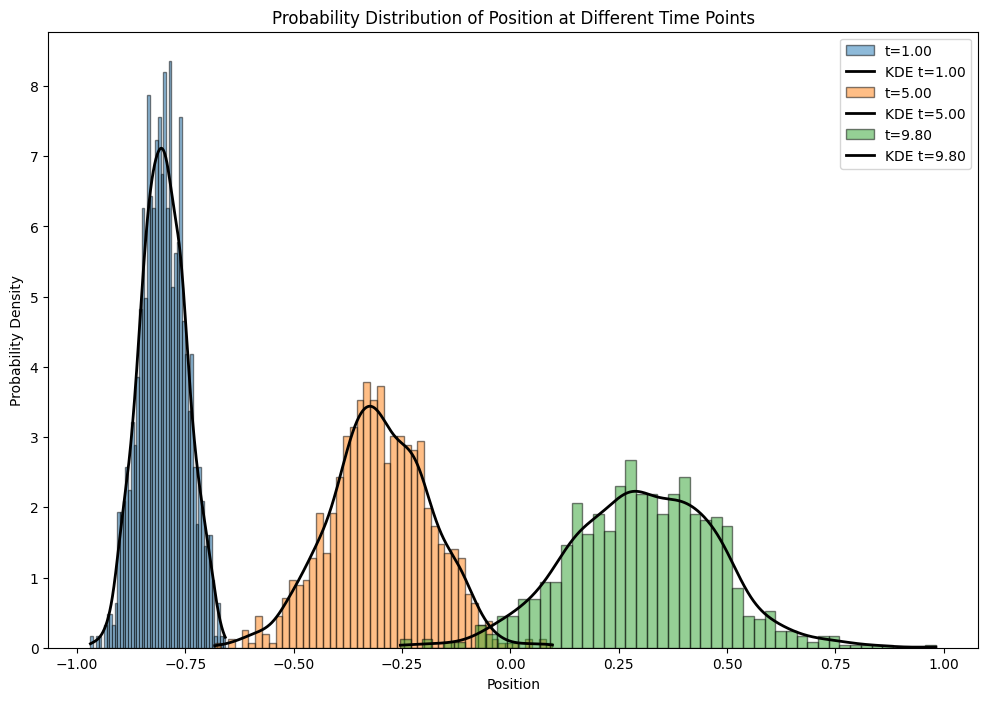

In [34]:
X_rescaled = rescale_data(X)
time_points = [int(num_steps * p) for p in [0.1, 0.5, 0.98]]
plt.figure(figsize=(12, 8))

for t in time_points:
    data_at_t = X_rescaled[:, t]    
    kde = gaussian_kde(data_at_t)
    x = np.linspace(min(data_at_t), max(data_at_t), 1000)
    kde_values = kde(x)
    hist, bins, _ = plt.hist(data_at_t, bins=50, alpha=0.5, density=True, label=f't={t*dt:.2f}', edgecolor='black')
    plt.plot(x, kde_values, 'k', lw=2, label=f'KDE t={t*dt:.2f}')

plt.xlabel('Position')
plt.ylabel('Probability Density')
plt.legend()
plt.title('Probability Distribution of Position at Different Time Points')
plt.show()

In [35]:
def sample_points_at_time(X, time_point, num_samples=100):
    data_at_time = X[:, time_point]
    kde = gaussian_kde(data_at_time)    
    sampled_points = kde.resample(num_samples).flatten()
    return sampled_points

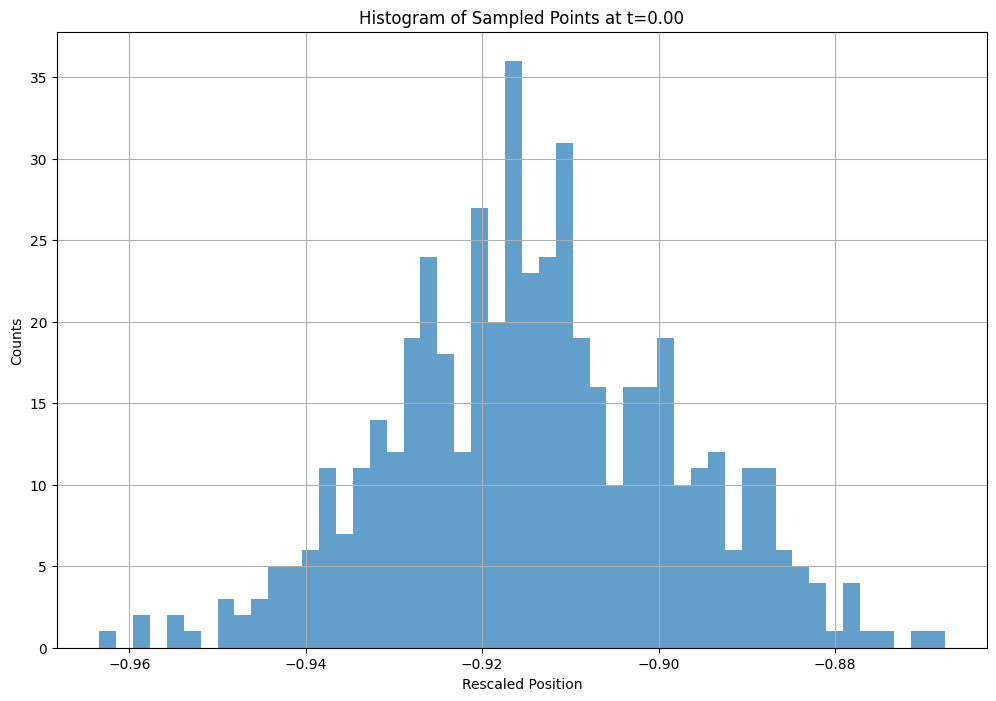

In [36]:
time_point_ratio = 0.01
time_index = int(num_steps * time_point_ratio)

num_samples = 500
sampled_points = sample_points_at_time(X_rescaled, time_index, num_samples)

# Plot the sampled points as a histogram
plt.figure(figsize=(12, 8))
plt.hist(sampled_points, bins=50, density=False, alpha=0.7)
plt.xlabel('Rescaled Position')
plt.ylabel('Counts')
plt.title(f'Histogram of Sampled Points at t={time_point_ratio*dt:.2f}')
plt.grid(True)
plt.show()